<h1 align="center">Homework 2</h1>
<h4 align="center">Ian Kirkpatrick<h4>
<hr>

Q1:
<br>
\begin{equation}
\text{(a) }
\text{Show the regions where } h(x) = + 1 \text{ and } h(x) = -1 \text{ are seperated by a line.}
\\
\text{If we express this line by the equation } 
\\
x_2 = ax_1+b 
\\
\text{ what are the slope of } a \text{ and intercept } b \text{ in terms of } w_0,w_1,w_2 \text{ ?}  
\\
\text{Since the hypothesis function is } sign(w^tx) \text{ with } w = (w_0,w_1,w_2)^T \text{ and } x = (1,x_1,x_2)^T 
\\
\text{which can be re-written as: }
\\
w_0(1)+w_1x_1+w_2x_2 = 0
\\
= w_2x_2 = -w_0(1)-w_1x_1
\\
= (w_2x_2 = -w_0(1)-w_1x_1)/w_2
\\
= x_2 = -\frac{w_0}{w_2}-\frac{w_1}{w_2}x_1
\\
\text{making } a = - \frac{w_1}{w_2} \text{ and } b = - \frac{w_0}{w_2}
\\
\text{gives } x_2 = ax_1+b
\end{equation}

\begin{equation}
\text{(b) }
\text{Graph the case for } 
\\
w = \left[1,2,3 \right]^T
\\
w = -\left[1,2,3 \right]^T
\end{equation}

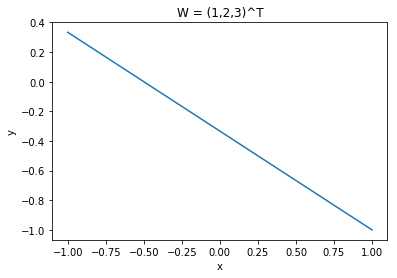

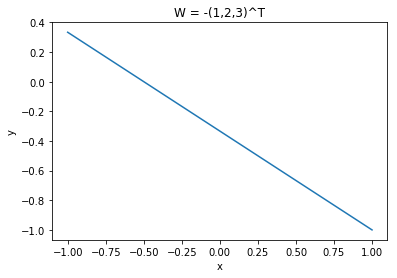

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plt_w(w, title):
    w0, w1, w2 = w
    slope = (-1*w1)/w2
    intercept = (-1*w0)/w2
    x_vals = np.array([-1,0,1])
    y_vals = intercept + slope * x_vals
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals, y_vals)
    plt.title(title)
    plt.show()
    
plt_w([1,2,3], 'w = (1,2,3)^T')
plt_w([-1,-2,-3], 'w = -(1,2,3)^T')

<hr>
Q2:
\begin{equation}
\text{(a)}
\\
\text{Generate a linearly seperable data set of size 20, and plot the}
\\
\text{examples as well as the target function } f
\text{ on a plane.}
\end{equation}

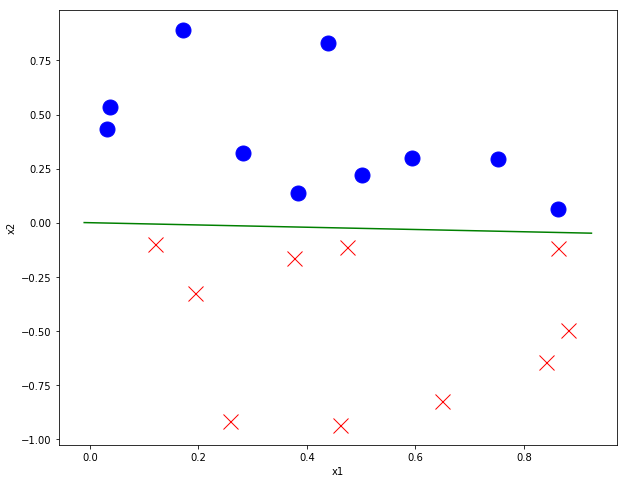

In [268]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice

SEED = 123
random.seed(SEED)

def plot_2d(X, y, slope_h, intercept_h):
    '''
    X = input data
    y = classifications
    slope_h = slope hypothesis
    intercept_h = intercept hypothesis
    slope_p = slope perceptron
    intercept_p = intercept perceptron
    '''

    #Obtain positive and negative classes
    pos_points = X[y == 1, :2]
    neg_points = X[y == -1, :2]
    plt.figure(1, figsize=(10, 8))

    # Assign different colors and shape to different classes
    plt.plot(pos_points[:, 0], pos_points[:, 1], "bo", markersize=15)
    plt.plot(neg_points[:, 0], neg_points[:, 1], "rx", markersize=15)
    
    # Plot hypothesis line
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept_h + slope_h * x_vals
    plt.plot(x_vals, y_vals, color='green')

    # add axis label and title, and pop out the figure.
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    return

def gen_data(slope, intercept, classifications, data):
    for i in range(classifications.shape[0]):
        res = classifications[i] # desired result
        x = data[i][0] # current x value in matr
        data[i][1] = get_y(slope, intercept, x, res)
        data[i][2] = 1
    return data

def get_y(slope, intercept, x, res):
    y = slope*x+intercept
    skew = random.random()
    # ensures skew is far enough away from line
    # (makes plot easier to read)
    while skew <= .05:
        skew = random.random()
    if res == -1:
        y -= skew
    if res == 1:
        y += skew
    return y

slope = random.random()*random.randint(-1, 1)
intercept = random.random()*random.randint(-1, 1)

data = np.random.rand(20,3)
hypo_set = np.random.rand(20,2)
classifications = \
np.array([1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

data = gen_data(slope, intercept, classifications, data)
plot_2d(data, classifications, slope, intercept)

\begin{equation}
\text{(b)}
\end{equation}

Number of iterations 2


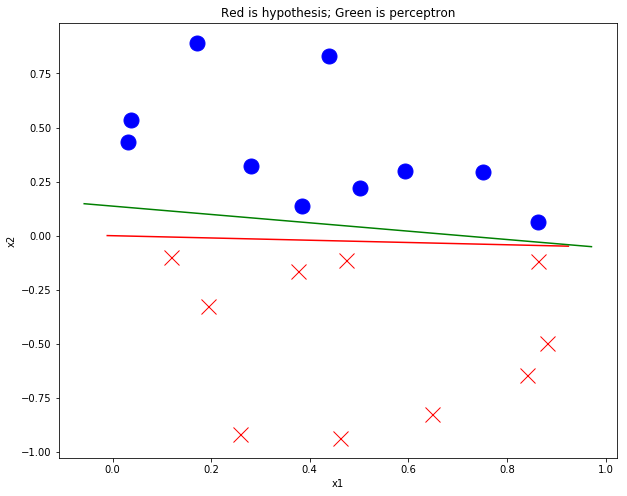

In [269]:
def plot_2d(X, y, slope_h, intercept_h, slope_p, intercept_p):
    '''
    X = input data
    y = classifications
    slope_h = slope hypothesis
    intercept_h = intercept hypothesis
    slope_p = slope perceptron
    intercept_p = intercept perceptron
    '''

    #Obtain positive and negative classes
    pos_points = X[y == 1, :2]
    neg_points = X[y == -1, :2]
    plt.figure(1, figsize=(10, 8))

    # Assign different colors and shape to different classes
    plt.plot(pos_points[:, 0], pos_points[:, 1], "bo", markersize=15)
    plt.plot(neg_points[:, 0], neg_points[:, 1], "rx", markersize=15)
    
    # Plot hypothesis line
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept_h + slope_h * x_vals
    plt.plot(x_vals, y_vals, color='red')
    
    # Plot perceptron line
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept_p + slope_p * x_vals
    plt.plot(x_vals, y_vals, color='green')

    # add axis label and title, and pop out the figure.
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title('Red is hypothesis; Green is perceptron')
    plt.show()
    return

def train_perceptron(training_data):
    '''
    Train a perceptron model given a set of training data
    :param training_data: A list of data points, where training_data[0]
    contains the data points and training_data[1] contains the labels.
    Labels are +1/-1.
    :return: learned model vector
    '''
    X = training_data[0]
    y = training_data[1]
    model_size = X.shape[1]
    w = np.random.rand(model_size)
    iteration = 1
    #print(X)
    while True:
        # compute results according to the hypothesis
        results = np.sign(np.multiply(np.matmul(X, w), y))
        #print('results', results)

        # get incorrect predictions (you can get the indices)

        # x.shape is the row by col dimensions of matrix
        #   np.arrange generates an np array of evenly
        #   spaced values in that range (in this case just
        #   the row dimenson)
        indices = np.arange(X.shape[0])
        # checking results in row dimension that didn't generate
        #   weren't successful and classifying making an array
        #   of those indicies != success
        misclassified_indicies = indices[results != 1]

        # Check the convergence criteria (if there is no misclassified
        # points, the PLA is converged and we can stop.)
        if len(misclassified_indicies) == 0:
            break

        # Pick one misclassified example.
        picked_misclassified = choice(misclassified_indicies)
        x_star, y_star = X[picked_misclassified], y[picked_misclassified]

        # Update the weight vector with perceptron update rule
        w += y_star * x_star

        iteration += 1

    return w,iteration

training_data = [data, classifications]
w,iterations = train_perceptron(training_data)
print('Number of iterations', iterations)

plot_2d(data, classifications, slope, intercept, (-w[0]/w[1]), -w[2]/w[1])

\begin{equation}
\text{The data is still sepearted by the line according to the weights generated}
\\
\text{ by the Perceptron Learning Algorithm, but the slopes vary slightly.}
\end{equation}

\begin{equation}
\text{(c)}
\end{equation}

Number of iterations 13


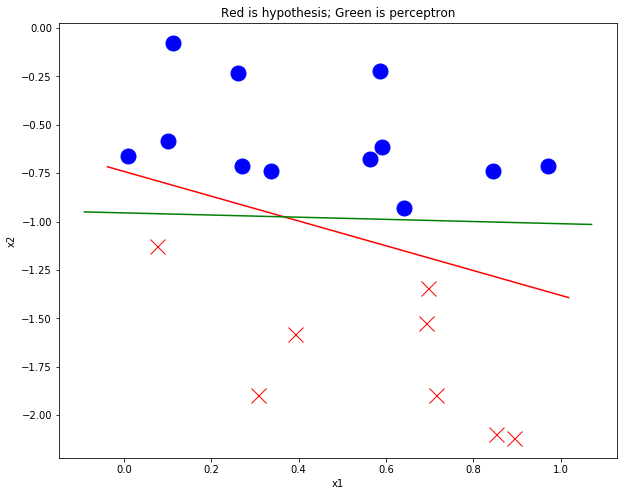

In [272]:
random.seed(42)

slope = random.random()*random.randint(-1, 1)
intercept = random.random()*random.randint(-1, 1)

data = np.random.rand(20,3)
hypo_set = np.random.rand(20,2)
classifications = \
np.array([1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1])

data = gen_data(slope, intercept, classifications, data)

training_data = [data, classifications]
w,iterations = train_perceptron(training_data)
print('Number of iterations', iterations)
plot_2d(data, classifications, slope, intercept, (-w[0]/w[1]), -w[2]/w[1])

\begin{equation}
\text{(d)}
\end{equation}

Number of iterations 34


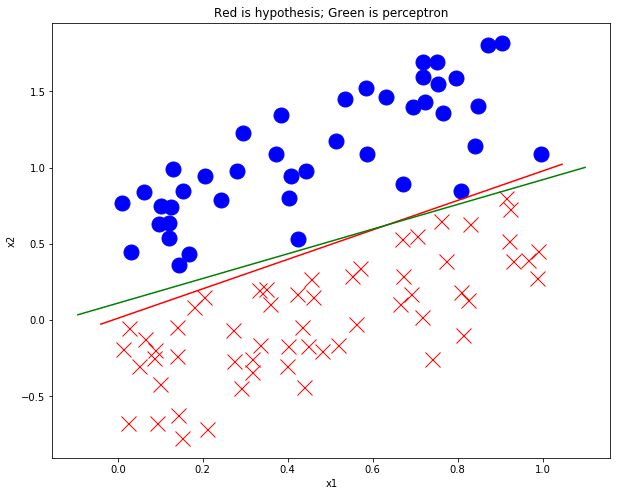

In [278]:
random.seed(56)

SIZE = 100

slope = random.random()*random.randint(-1, 1)
intercept = random.random()*random.randint(-1, 1)

data = np.random.rand(SIZE,3)
hypo_set = np.random.rand(SIZE,2)
neg1s = random.randint(int(SIZE*.25), int(SIZE*.75)) # negative 1s
pos1s = SIZE - neg1s # rest of the size
classifications = \
np.array(neg1s*[-1]+pos1s*[1])

data = gen_data(slope, intercept, classifications, data)

training_data = [data, classifications]
w,iterations = train_perceptron(training_data)
print('Number of iterations', iterations)
plot_2d(data, classifications, slope, intercept, (-w[0]/w[1]), -w[2]/w[1])

\begin{equation}
\text{(e)}
\end{equation}

Number of iterations 39


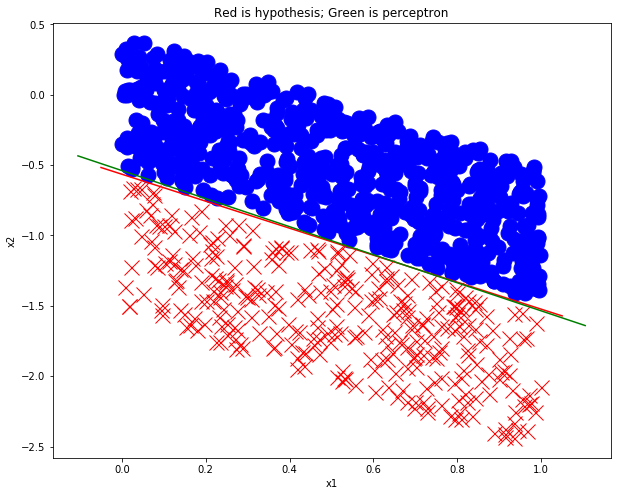

In [297]:
random.seed(-812341261)

SIZE = 1000

slope = random.random()*random.randint(-1, 1)
intercept = random.random()*random.randint(-1, 1)

data = np.random.rand(SIZE,3)
hypo_set = np.random.rand(SIZE,2)
neg1s = random.randint(int(SIZE*.25), int(SIZE*.75)) # (-)1s
pos1s = SIZE - neg1s # rest of the size for (+)1s
classifications = \
np.array(neg1s*[-1]+pos1s*[1])

data = gen_data(slope, intercept, classifications, data)

training_data = [data, classifications]
w,iterations = train_perceptron(training_data)
print('Number of iterations', iterations)
plot_2d(data, classifications, slope, intercept, (-w[0]/w[1]), -w[2]/w[1])

\begin{equation}
\text{(f)}
\end{equation}

In [404]:
random.seed(531)

def gen_data(slope, intercept, classifications, data, xn):
    for i in range(classifications.shape[0]):
        res = classifications[i] # desired result
        for j in range(xn-1):
            x = data[i][j] # current x value in matr
            data[i][j] = get_y(slope, intercept, x, res)
        
        
    return data


SIZE = 100 # rows
xn = 10 # cols

slope = random.random()*random.randint(-1, 1)
intercept = random.random()*random.randint(-1, 1)

data = np.random.rand(SIZE,xn)
hypo_set = np.random.rand(SIZE,xn)
neg1s = random.randint(int(SIZE*.25), int(SIZE*.75)) # (-)1s
pos1s = SIZE - neg1s # rest of the size for (+)1s
classifications = \
np.array(pos1s*[1]+neg1s*[-1])

data = gen_data(slope, intercept, classifications, data, xn)

training_data = [data, classifications]
w,iterations = train_perceptron(training_data)
print('Number of iterations before converging: ', iterations)

Number of iterations before converging:  571


\begin{equation}
\text{(g)}
\end{equation}

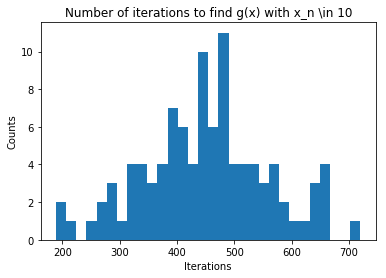

In [418]:
import matplotlib.pyplot as plt

iter_cnts = []
for i in range(100):
    training_data = [data, classifications]
    w,iterations = train_perceptron(training_data)
    iter_cnts.append(iterations)
    
#print(iter_cnts)
bins = len(iter_cnts)

x = np.random.normal(size = 1000)
plt.hist(x=iter_cnts, bins=30)
plt.ylabel('Counts')
plt.xlabel('Iterations')
plt.title('Number of iterations to find g(x) with x_n \in 10')
plt.show()

\begin{equation}
\text{(h)}
\\
\text{As N grows the approximation of the original hypotehsis becomes more accurate.}
\\
\text{As D grows the approximation doesn't necessarily become more accurate, }
\\
\text{but then runtime increases significantly.}
\end{equation}